In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bengali-ai/y_banglaHW_list_vowel.pickle
/kaggle/input/bengali-ai/y_banglaHW_list_consonant.pickle
/kaggle/input/bengali-ai/x_banglaHW_list.pickle
/kaggle/input/bengali-ai/y_banglaHW_list_root.pickle
/kaggle/input/bengaliai-cv19/test_image_data_2.parquet
/kaggle/input/bengaliai-cv19/test_image_data_3.parquet
/kaggle/input/bengaliai-cv19/test_image_data_0.parquet
/kaggle/input/bengaliai-cv19/train.csv
/kaggle/input/bengaliai-cv19/test_image_data_1.parquet
/kaggle/input/bengaliai-cv19/class_map.csv
/kaggle/input/bengaliai-cv19/train_image_data_3.parquet
/kaggle/input/bengaliai-cv19/train_image_data_2.parquet
/kaggle/input/bengaliai-cv19/test.csv
/kaggle/input/bengaliai-cv19/sample_submission.csv
/kaggle/input/bengaliai-cv19/train_image_data_1.parquet
/kaggle/input/bengaliai-cv19/train_image_data_0.parquet


In [2]:
import pyarrow.parquet as pq

import pyarrow as pa

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd
import pickle

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split



import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import clone_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

import keras



Using TensorFlow backend.


In [3]:
pickle_inx = open("/kaggle/input/bengali-ai/x_banglaHW_list.pickle", "rb")
trainX = pickle.load(pickle_inx)

pickle_iny = open("/kaggle/input/bengali-ai/y_banglaHW_list_root.pickle", "rb")
trainYRoot = pickle.load(pickle_iny)

pickle_iny = open("/kaggle/input/bengali-ai/y_banglaHW_list_vowel.pickle", "rb")
trainYVowel = pickle.load(pickle_iny)

pickle_iny = open("/kaggle/input/bengali-ai/y_banglaHW_list_consonant.pickle", "rb")
trainYConsonant = pickle.load(pickle_iny)


<function matplotlib.pyplot.show(*args, **kw)>

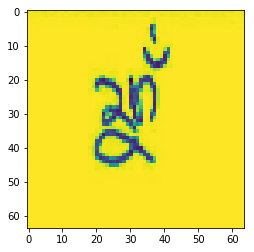

In [4]:
plt.imshow(trainX[20039])
plt.show

In [5]:
IMG_SIZE = 64
trainX = np.array(trainX).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [6]:
trainX.shape

(200840, 64, 64, 1)

In [7]:
def get_dummies(df):
    cols = []
    for col in df:
        cols.append(pd.get_dummies(df[col].astype(str)))
    return pd.concat(cols, axis=1) 

In [8]:
trainYRoot = pd.get_dummies(trainYRoot).values
trainYVowel = pd.get_dummies(trainYVowel).values
trainYConsonant = pd.get_dummies(trainYConsonant).values

In [9]:
print(trainYRoot.shape)
print(trainYVowel.shape)
print(trainYConsonant.shape)

(200840, 168)
(200840, 11)
(200840, 7)


In [10]:
trainX = trainX/255.0

In [11]:
trainX[89064]

array([[[0.99607843],
        [0.99607843],
        [0.99607843],
        ...,
        [0.985386  ],
        [0.9917193 ],
        [0.9890041 ]],

       [[0.99607843],
        [0.99607843],
        [0.99607843],
        ...,
        [0.99061924],
        [0.99381125],
        [0.99246323]],

       [[0.9938869 ],
        [0.99607843],
        [0.99607843],
        ...,
        [0.9994179 ],
        [0.9994361 ],
        [0.99523497]],

       ...,

       [[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [0.9953144 ]],

       [[1.        ],
        [0.99607843],
        [0.99607843],
        ...,
        [1.        ],
        [1.        ],
        [0.9942488 ]],

       [[1.        ],
        [0.99607843],
        [0.99607843],
        ...,
        [0.9995261 ],
        [1.        ],
        [0.992761  ]]], dtype=float32)

In [12]:



xTrainData, xTestData, yTrainRootData, yTestRootData, yTrainVowelData, yTestVowelData, yTrainConsonantData, yTestConsonantData  = train_test_split(trainX, trainYRoot, trainYVowel, trainYConsonant, test_size=0.1)

In [13]:
print((xTrainData.shape))
print((xTestData.shape))
print((yTrainRootData.shape))
print((yTestRootData.shape))
print((yTrainVowelData.shape))
print((yTestVowelData.shape))
print((yTrainConsonantData.shape))
print((yTestConsonantData.shape))

(180756, 64, 64, 1)
(20084, 64, 64, 1)
(180756, 168)
(20084, 168)
(180756, 11)
(20084, 11)
(180756, 7)
(20084, 7)


In [14]:
yTrainRootData[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [15]:
inputs = Input(shape = (IMG_SIZE, IMG_SIZE, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1))(inputs)
model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=32, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
model = Dropout(rate=0.3)(model)

model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=64, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.3)(model)
#Added More Layers
model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=128, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.3)(model)

model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=256, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=256, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.3)(model)

model = Conv2D(filters=512, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=512, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=512, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.3)(model)

model = Conv2D(filters=1024, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = Conv2D(filters=1024, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=1024, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.3)(model)


model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dropout(rate=0.3)(model)
dense = Dense(512, activation = "relu")(model)
'''model = Dropout(rate=0.3)(model)
dense = Dense(256, activation = "relu")(model)
model = Dropout(rate=0.3)(model)
dense = Dense(128, activation = "relu")(model)'''

head_root = Dense(168, activation = 'softmax')(dense)
head_vowel = Dense(11, activation = 'softmax')(dense)
head_consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[head_root, head_vowel, head_consonant])

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set a learning rate annealer. Learning rate will be half after 3 epochs if accuracy is not increased
learning_rate_reduction_root = ReduceLROnPlateau(monitor='dense_2_accuracy', 
                                            patience=3, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)
learning_rate_reduction_vowel = ReduceLROnPlateau(monitor='dense_3_accuracy', 
                                            patience=3, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)
learning_rate_reduction_consonant = ReduceLROnPlateau(monitor='dense_4_accuracy', 
                                            patience=3, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)



In [17]:

batch_size = 1024
epochs = 80

class MultiOutputDataGenerator(keras.preprocessing.image.ImageDataGenerator):

    def flow(self,
             x,
             y=None,
             batch_size=32,
             shuffle=True,
             sample_weight=None,
             seed=None,
             save_to_dir=None,
             save_prefix='',
             save_format='png',
             subset=None):

        targets = None
        target_lengths = {}
        ordered_outputs = []
        for output, target in y.items():
            if targets is None:
                targets = target
            else:
                targets = np.concatenate((targets, target), axis=1)
            target_lengths[output] = target.shape[1]
            ordered_outputs.append(output)


        for flowx, flowy in super().flow(x, targets, batch_size=batch_size,
                                         shuffle=shuffle):
            target_dict = {}
            i = 0
            for output in ordered_outputs:
                target_length = target_lengths[output]
                target_dict[output] = flowy[:, i: i + target_length]
                i += target_length

            yield flowx, target_dict



In [18]:

datagen = MultiOutputDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.15, # Randomly zoom image 
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


    # This will just calculate parameters required to augment the given data. This won't perform any augmentations
datagen.fit(xTrainData)

# Fit the model

#gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction = 0.25)

#sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

history = model.fit_generator(datagen.flow(xTrainData, {'dense_2': yTrainRootData, 'dense_3': yTrainVowelData, 'dense_4': yTrainConsonantData}, batch_size=batch_size),
                          epochs = epochs, validation_data = (xTestData, [yTestRootData, yTestVowelData, yTestConsonantData]), 
                          steps_per_epoch=xTrainData.shape[0] // batch_size, 
                          callbacks=[learning_rate_reduction_root, learning_rate_reduction_vowel, learning_rate_reduction_consonant]
                             )

Train for 176 steps, validate on 20084 samples
Epoch 1/80
176/176 [==============================] - 136s 771ms/step - loss: 7.2733 - dense_2_loss: 4.6674 - dense_3_loss: 1.4461 - dense_4_loss: 1.1598 - dense_2_accuracy: 0.0306 - dense_3_accuracy: 0.4729 - dense_4_accuracy: 0.6248 - val_loss: 6.3178 - val_dense_2_loss: 4.4940 - val_dense_3_loss: 0.8824 - val_dense_4_loss: 0.9391 - val_dense_2_accuracy: 0.0402 - val_dense_3_accuracy: 0.6833 - val_dense_4_accuracy: 0.6691
Epoch 2/80
176/176 [==============================] - 122s 694ms/step - loss: 5.5943 - dense_2_loss: 4.2299 - dense_3_loss: 0.5963 - dense_4_loss: 0.7681 - dense_2_accuracy: 0.0497 - dense_3_accuracy: 0.8002 - dense_4_accuracy: 0.7323 - val_loss: 4.8809 - val_dense_2_loss: 3.8752 - val_dense_3_loss: 0.4760 - val_dense_4_loss: 0.5282 - val_dense_2_accuracy: 0.0680 - val_dense_3_accuracy: 0.8560 - val_dense_4_accuracy: 0.8116
Epoch 3/80
176/176 [==============================] - 117s 663ms/step - loss: 4.4449 - dense_2_lo

In [19]:
model.save('model_b_hw.hdf5')

In [20]:
filename = 'finalized_model_b_hw.sav'
pickle.dump(model, open(filename, 'wb'))

TypeError: can't pickle _thread.RLock objects